In [1]:
#import dependencies
import csv
import pandas as pd
import numpy as np

In [2]:
train = df_samples = pd.read_excel(r'hepatitisBC.xlsx', engine='openpyxl')


In [3]:
def sum_col(x):
    if  any(x)==1:
        return x.values.sum()

ndf = train.groupby('prognosis',as_index=False).agg(lambda x:(sum_col(x)))

In [4]:
ndf2=ndf.fillna(0)
df=ndf2.copy()

In [5]:
disease_df=df
symptom_df=df

In [6]:


# Calculate the total count of cases for each symptom in both diseases
total_counts = symptom_df.sum(axis=0)[1:]

# Create a dictionary to store the conditional probabilities
p_Symptom_given_Disease = {}

# Calculate the conditional probabilities for each symptom given each disease
for disease in symptom_df['prognosis']:
    p_Symptom_given_Disease[disease] = {}
    for symptom in symptom_df.columns[1:]:
        if total_counts[symptom] != 0:
            p_Symptom_given_Disease[disease][symptom] = symptom_df[symptom_df['prognosis'] == disease][symptom].sum() / total_counts[symptom]

# Convert to the desired dictionary format
output_dict = {}
for disease in symptom_df['prognosis']:
    output_dict[disease] = p_Symptom_given_Disease[disease]

# Print the conditional probabilities in the desired format
print(output_dict)

{'Hepatitis B': {'itching': 1.0, 'fatigue': 0.5, 'lethargy': 1.0, 'yellowish_skin': 0.5, 'dark_urine': 1.0, 'nausea': 0.0, 'loss_of_appetite': 0.5, 'abdominal_pain': 1.0, 'yellow_urine': 1.0, 'yellowing_of_eyes': 0.5263157894736842, 'malaise': 1.0, 'family_history': 0.0, 'receiving_blood_transfusion': 1.0, 'receiving_unsterile_injections': 1.0}, 'Hepatitis C': {'itching': 0.0, 'fatigue': 0.5, 'lethargy': 0.0, 'yellowish_skin': 0.5, 'dark_urine': 0.0, 'nausea': 1.0, 'loss_of_appetite': 0.5, 'abdominal_pain': 0.0, 'yellow_urine': 0.0, 'yellowing_of_eyes': 0.47368421052631576, 'malaise': 0.0, 'family_history': 1.0, 'receiving_blood_transfusion': 0.0, 'receiving_unsterile_injections': 0.0}}


In [7]:
!pip install pyvis


In [8]:
import numpy as np
import networkx as nx
from pyvis.network import Network
import random
# Create dictionaries for P(Disease) and P(Symptom | Disease)
num_diseases = 2
equal_probability = 1 / num_diseases
disease_names = ['Hepatitis B', 'Hepatitis C']
disease_prior_probabilities = {disease: equal_probability for disease in disease_names}

disease_symptom_clusters = output_dict

# Create a graph
G = nx.Graph()

# Define a color mapping function for diseases
def get_random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Calculate P(Disease | Symptoms) using Naive Bayes formula for all diseases
results = {}
sum_prob = 0.0  # To calculate the sum of probabilities for normalization

for disease in disease_prior_probabilities:
    query_prob = disease_prior_probabilities[disease]
    valid_symptoms = {
        symptom: disease_symptom_clusters[disease][symptom]
        for symptom in disease_symptom_clusters[disease] if disease_symptom_clusters[disease][symptom] != 0
    }
    
    if valid_symptoms:
        for symptom, symptom_prob in valid_symptoms.items():
            query_prob *= symptom_prob
        results[disease] = query_prob
        sum_prob += query_prob

# Normalize the probabilities for diseases
for disease, probability in results.items():
    results[disease] = probability / sum_prob

# Add disease nodes with prior probabilities and assign colors dynamically
disease_colors = {}
for disease, probability in disease_prior_probabilities.items():
    disease_color = get_random_color()
    disease_colors[disease] = disease_color
    label = f"{disease}\nPrior: {probability:.3f}\nPosterior: {results[disease]:.4f}"
    G.add_node(label, color=disease_color)

# Add symptom nodes with conditional probabilities and assign colors based on associated disease colors
for disease, symptoms in disease_symptom_clusters.items():
    disease_color = disease_colors[disease]
    valid_symptoms = {
        symptom: symptom_prob
        for symptom, symptom_prob in symptoms.items() if symptom_prob != 0
    }
    
    for symptom, probability in valid_symptoms.items():
        label = f"{symptom}\n{probability:.3f}"
        G.add_node(label, color=disease_color)

# Add edges between disease nodes and associated symptom nodes
for disease, symptoms in disease_symptom_clusters.items():
    for symptom, symptom_prob in symptoms.items():
        if symptom_prob != 0:
            disease_label = f"{disease}\nPrior: {disease_prior_probabilities[disease]:.3f}\nPosterior: {results[disease]:.4f}"
            symptom_label = f"{symptom}\n{symptom_prob:.3f}"
            G.add_edge(disease_label, symptom_label)

# Create a Network object
nt = Network(notebook=True, width="100%", height="800px")

# Show the graph
nt.from_nx(G)
nt.show("disease_symptom_graph.html")


disease_symptom_graph.html


In [9]:
import numpy as np
import networkx as nx
from pyvis.network import Network
import random
# Create dictionaries for P(Disease) and P(Symptom | Disease)
num_diseases = 2
equal_probability = 1 / num_diseases
disease_names = ['Hepatitis B', 'Hepatitis C']
disease_prior_probabilities = {disease: equal_probability for disease in disease_names}
disease_symptom_clusters = output_dict

# Symptoms in evidence
evidence_symptoms = ['loss_of_appetite','nausea','family_history']

# Create a graph
G = nx.Graph()

# Define a color mapping function for diseases
def get_random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# Calculate P(Disease | Symptoms) using Naive Bayes formula for all diseases based on evidence symptoms
results = {}
sum_prob = 0.0  # To calculate the sum of probabilities for normalization

for disease in disease_prior_probabilities:
    query_prob = disease_prior_probabilities[disease]
    valid_symptoms = {
        symptom: disease_symptom_clusters[disease][symptom]
        for symptom in evidence_symptoms if symptom in disease_symptom_clusters[disease] and disease_symptom_clusters[disease][symptom] != 0
    }
    
    if valid_symptoms:
        for symptom, symptom_prob in valid_symptoms.items():
            query_prob *= symptom_prob
        results[disease] = query_prob
        sum_prob += query_prob

# Normalize the probabilities for diseases
for disease, probability in results.items():
    results[disease] = probability / sum_prob

# Calculate the highest posterior probability
highest_posterior = max(results.values())

# Print the highest posterior probability
print("Highest Posterior Probability:", highest_posterior)

# Add disease nodes with prior probabilities and assign colors dynamically
disease_colors = {}
for disease, probability in disease_prior_probabilities.items():
    disease_color = get_random_color()
    disease_colors[disease] = disease_color
    label = f"{disease}\nPrior: {probability:.3f}\nPosterior: {results[disease]:.4f}"
    G.add_node(label, color=disease_color)

# Add symptom nodes with conditional probabilities and assign colors based on associated disease colors
for disease, symptoms in disease_symptom_clusters.items():
    if any(symptom in evidence_symptoms for symptom in symptoms):
        disease_color = disease_colors[disease]
        valid_symptoms = {
            symptom: symptom_prob
            for symptom, symptom_prob in symptoms.items() if symptom in evidence_symptoms and symptom_prob != 0
        }

        for symptom, probability in valid_symptoms.items():
            label = f"{symptom}\n{probability:.3f}"
            G.add_node(label, color=disease_color)

# Add edges between disease nodes and associated symptom nodes
for disease, symptoms in disease_symptom_clusters.items():
    if any(symptom in evidence_symptoms for symptom in symptoms):
        for symptom, symptom_prob in symptoms.items():
            if symptom in evidence_symptoms and symptom_prob != 0:
                disease_label = f"{disease}\nPrior: {disease_prior_probabilities[disease]:.3f}\nPosterior: {results[disease]:.4f}"
                symptom_label = f"{symptom}\n{symptom_prob:.3f}"
                G.add_edge(disease_label, symptom_label)

# Create a Network object
nt = Network(notebook=True, width="100%", height="800px")

# Show the graph
nt.from_nx(G)
nt.show("disease_symptom_graph.html")


Highest Posterior Probability: 0.5
disease_symptom_graph.html


In [10]:

import time
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import time

%matplotlib inline

from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import State
from pgmpy.sampling import BayesianModelSampling
from pgmpy.sampling import GibbsSampling
import networkx as nx

C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
cleanup_nums = {"prognosis":     {"Hepatitis B": 0, "Hepatitis C": 1}}

In [12]:
train2 = train.replace(cleanup_nums)

In [13]:
architecture= [("itching", "prognosis"),
                   
                      
                       ("fatigue", "prognosis"),
                       ("lethargy", "prognosis"),
                    
                       ("yellowish_skin", "prognosis"),
                       ("dark_urine", "prognosis"),
                       ("nausea", "prognosis"),
                       ("loss_of_appetite", "prognosis"),
                       ("abdominal_pain", "prognosis"),
                     
                     
                       ("yellow_urine", "prognosis"),
                       ("yellowing_of_eyes", "prognosis"),
                      
                       ("malaise", "prognosis"),
             
                       ("family_history", "prognosis"),
                       ("receiving_blood_transfusion", "prognosis"),
                       ("receiving_unsterile_injections", "prognosis")]

In [14]:
model = BayesianModel(architecture)

In [15]:
nodes = list(model.nodes())
edges = list(model.edges())

print('The nodes of the net are: {}'.format(nodes))
print('The edges of the net are: {}'.format(edges))

The nodes of the net are: ['itching', 'prognosis', 'fatigue', 'lethargy', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'abdominal_pain', 'yellow_urine', 'yellowing_of_eyes', 'malaise', 'family_history', 'receiving_blood_transfusion', 'receiving_unsterile_injections']
The edges of the net are: [('itching', 'prognosis'), ('fatigue', 'prognosis'), ('lethargy', 'prognosis'), ('yellowish_skin', 'prognosis'), ('dark_urine', 'prognosis'), ('nausea', 'prognosis'), ('loss_of_appetite', 'prognosis'), ('abdominal_pain', 'prognosis'), ('yellow_urine', 'prognosis'), ('yellowing_of_eyes', 'prognosis'), ('malaise', 'prognosis'), ('family_history', 'prognosis'), ('receiving_blood_transfusion', 'prognosis'), ('receiving_unsterile_injections', 'prognosis')]


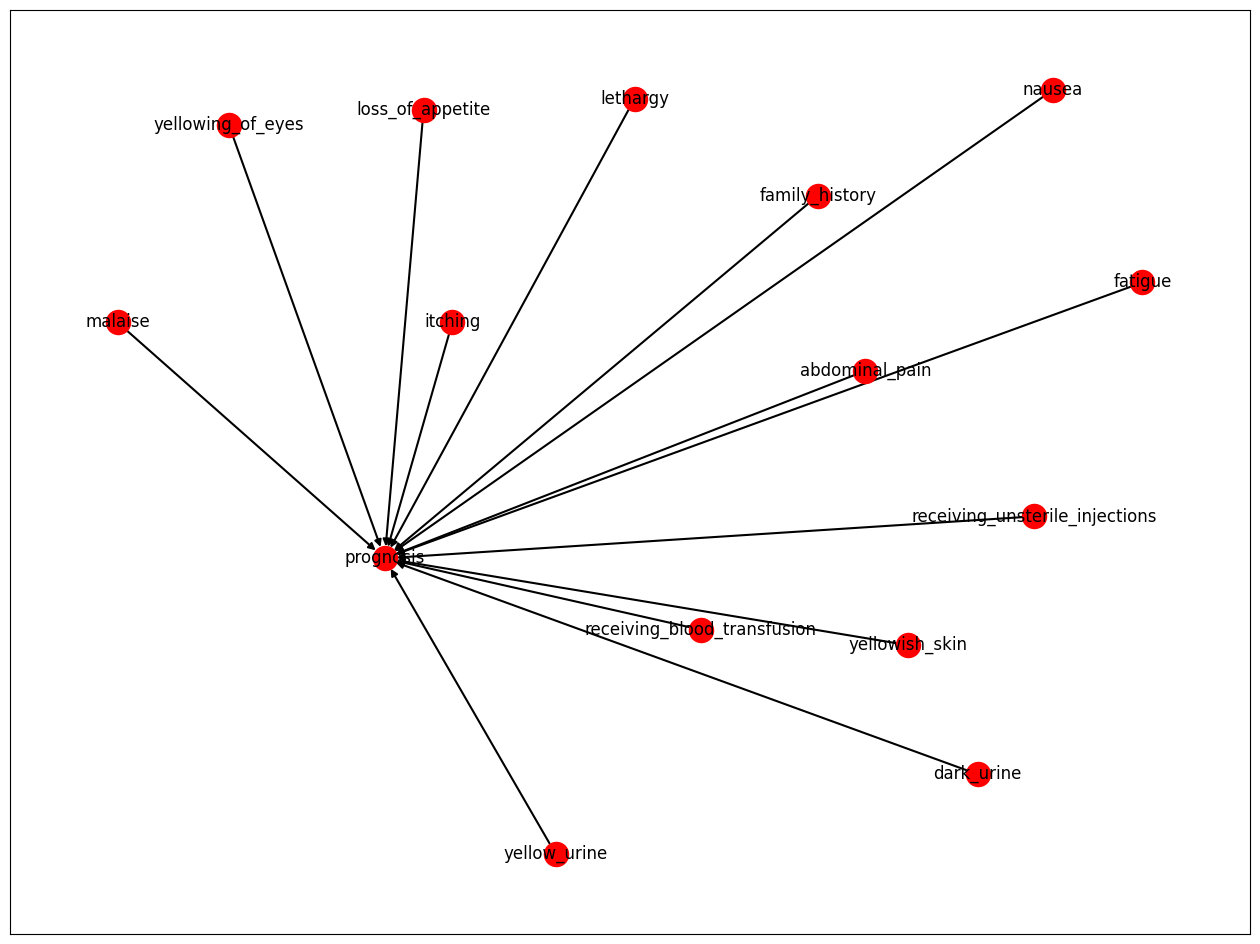

In [16]:
DAG = nx.DiGraph()
DAG.add_edges_from(edges)

fig = plt.figure(figsize = (16,12))
pos = nx.spring_layout(DAG) 

nx.draw_networkx_nodes(DAG, pos = pos, node_color = 'red')
nx.draw_networkx_labels(DAG, pos = pos)
nx.draw_networkx_edges(DAG, pos = pos, edge_color = 'black', width = 1.5, arrows = True)

plt.show()

In [17]:
from IPython.core.display import display, HTML

# disable text wrapping in output cell
display(HTML(""))

model.cpds = []
model.fit(  data=train2
          , estimator=BayesianEstimator
          , prior_type="BDeu"
          , equivalent_sample_size=10
          ,complete_samples_only=False)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of itching:
+------------+-------+
| itching(0) | 0.524 |
+------------+-------+
| itching(1) | 0.476 |
+------------+-------+ 

CPT of prognosis:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
from pgmpy.inference import VariableElimination
inference =VariableElimination(model)

In [19]:

BMS_inference = BayesianModelSampling(model)
GS_inference = GibbsSampling(model)



In [20]:

# Dictionary of the discrete value to let the method access at CPTs
value_dict = {
    True: 1,
    False: 0,
    '0-15': 0,
    '16-45': 1,
    '46-90': 2,
    '1': 0,
    '2': 1,
    '3': 2,
    '4': 3,
    '5': 4,
    'sv': 0,
    '<=5': 1,
    '5.5-6.5': 2,
    '7-9.5': 3,
    '>=10': 4
}

def discretization(x, value):
    '''
    Function that helps to discretize for likelihood weighting and rejection sampling
    x     : unknown variable
    value : value to analyze for the unknown variable based on the value of the query variable
    '''
    if x == value_dict[value]:
        return 1
    else:
        return 0

def prob_LW(samples, variable, query_value):
    '''
    Function that calculates the likelihood weighting probability
    samples     : sample from which to extract the probability value
    variable    : variable of the query
    query_value : value of the query variable
    '''
    discretize = np.vectorize(discretization)
    samples_thresholded = discretize(samples[variable], query_value)
    return round(np.sum(np.dot(samples_thresholded, samples['_weight'])) / np.sum(samples['_weight']), 2)

def prob_RS(samples, variable, query_value):
    '''
    Function that calculates the rejection sampling probability
    samples     : sample from which to extract the probability value
    variable    : variable of the query
    query_value : value of the query variable
    '''
    discretize = np.vectorize(discretization)
    samples_rejection = discretize(samples[variable], query_value)
    return np.mean(samples_rejection, axis=0)

def get_state_index(var, var_val):
    '''
    Function that returns the index of a given value for a variable
    '''
    return inference.query([var], show_progress=False).state_names.get(var).index(var_val)

def prob_GS(samples, query_variable, query_evidence, query_value):
    """
    Computes the probability of Gibbs Sampling given the samples
    it will call a pgmpy query function building the string for the requested query
    """
    gs_query = ""
    for evidence, value in query_evidence.items():
        gs_query += evidence + " == " + str(get_state_index(evidence, value))
        if evidence != list(query_evidence.keys())[-1]:
            # add the '&' except for the last element
            gs_query += " & "

    # check denominator to avoid division by 0
    if samples.query(gs_query).shape[0] == 0:
        return 0.0
    else:
        return (samples.query(query_variable[0] + " == " + str(get_state_index(query_variable[0], query_value)) + " & " + gs_query).shape[0] 
              / samples.query(gs_query).shape[0])

#Absolute error function
def absolute_error(exact_value, approx_value):
    '''
    Function that computes the absolute error between the approximated and exact probabilities
    exact_value   : reference probability value of the query
    approx_value  : approximate probability value of the query
    '''
    return np.absolute(exact_value - approx_value)

#Relative error function
def relative_error(exact_value, approx_value):
    '''
    Function that computes the absolute error between the approximated and exact probabilities
    exact_value   : reference probability value of the query
    approx_value  : approximate probability value of the query
    '''
    return np.absolute(((exact_value - approx_value) / approx_value))

def query_preprocessing(query_variable, query_evidence, query_value):
    '''
    Function that returns the processed query variable, evidence to adapt them to the methods
    of likelihood weighting and rejection sampling

    query_variable: list with one unknown variable of the query
    query_evidence: dict representing the evidence of the query
    query_value   : value of the query var to find in the query
    '''
    evidence = []

    for (evidence_var, evidence_value) in query_evidence.items():
        state = State(evidence_var, evidence_value)
        evidence.append(state)

    query_prob = highest_posterior
    variables = query_variable[0]

    return query_prob, evidence, variables

def run_experiment(sample_size, query_variable, query_evidence, query_value):
    '''
    Function that return the result of a sampling experiment using likelihood weighting,
    rejection sampling and Gibbs sampling

    sample_size    : size of the sample for the experiment
    query_variable : list with one unknown variable of the query
    query_evidence : dict representing the evidence of the query
    query_value    : value of the query var to find in the query
    '''

    # Rounding precision
    precision = 3

    # Preprocessing for the LW and RS methods
    query_prob, evidence, variable = query_preprocessing(query_variable, query_evidence, query_value)

    t0_LW = time.time()
    samples_LW = BMS_inference.likelihood_weighted_sample(evidence=evidence, size=sample_size, return_type='recarray')
    approx_prob_LW = prob_LW(samples_LW, variable, query_value)
    time_LW = round(time.time() - t0_LW, precision)

    t0_RS = time.time()
    samples_RS = BMS_inference.rejection_sample(evidence=evidence, size=sample_size, return_type='recarray', show_progress=False)
    approx_prob_RS = prob_RS(samples_RS, variable, query_value)
    time_RS = round(time.time() - t0_RS, precision)

    t0_GS = time.time()
    samples_GS = GS_inference.sample(size=sample_size, seed=37)
    approx_prob_GS = prob_GS(samples_GS, query_variable, query_evidence, query_value)
    time_GS = round(time.time() - t0_GS, precision)

    return np.array([(sample_size,
                      approx_prob_RS, absolute_error(query_prob, approx_prob_RS), relative_error(query_prob, approx_prob_RS), time_RS,
                      approx_prob_LW, absolute_error(query_prob, approx_prob_LW), relative_error(query_prob, approx_prob_LW), time_LW,
                      approx_prob_GS, absolute_error(query_prob, approx_prob_GS), relative_error(query_prob, approx_prob_GS), time_GS)],
                    dtype=[('sample_size', '<i8'),
                           ('approx_prob_RS', '<f8'), ('abs_error_RS', '<f8'), ('rel_error_RS', '<f8'), ('time_RS', '<f8'),
                           ('approx_prob_LW', '<f8'), ('abs_error_LW', '<f8'), ('rel_error_LW', '<f8'), ('time_LW', '<f8'),
                           ('approx_prob_GS', '<f8'), ('abs_error_GS', '<f8'), ('rel_error_GS', '<f8'), ('time_GS', '<f8')])

def approximate_inference(q, query_var, query_evidence, query_value, starting_size=2.5, final_size=5, experiments=10):  
    '''
    Function that create the result of the different approximate inference methods using
    different sample size values

    query_var     : list with one unknown variable of the query
    query_evidence: dict representing the evidence of the query
    query_value   : value of the query var to find in the query
    starting_size : exponent of the number of start sample points that are 10^(starting_size)
    final_size    : exponent of the number of final sample points that are 10^(final_size)
    experiments   : number of sampling experiments
    '''
    results = np.array([], dtype=[('sample_size', '<i8'),
                                  ('approx_prob_RS', '<f8'), ('abs_error_RS', '<f8'), ('rel_error_RS', '<f8'), ('time_RS', '<f8'),
                                  ('approx_prob_LW', '<f8'), ('abs_error_LW', '<f8'), ('rel_error_LW', '<f8'), ('time_LW', '<f8'),
                                  ('approx_prob_GS', '<f8'), ('abs_error_GS', '<f8'), ('rel_error_GS', '<f8'), ('time_GS', '<f8')])

    for size in np.logspace(starting_size, final_size, num=experiments, dtype='<i8'):
        results = np.append(results, run_experiment(size, query_var, query_evidence, query_value))

    globals()[f"query{q}"] = pd.DataFrame(results)
    globals()[f"query{q}"].to_csv(f"query{q}.csv")
    
    print("\nResults during sampling:")
    display(pd.DataFrame(results))
    print("\n")
    
    plot_results(results, query_evidence, query_var, query_value)

# Ensure plot_results function is defined elsewhere in your code


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Set the desired figure size
figure_width = 80  # Further increased to make the plots broader
figure_height = 40  # Increased height for better aspect ratio

# Adjust font sizes globally
plt.rcParams.update({
    'font.size': 60,  # Increased font size for general text
    'legend.fontsize': 58,  # Increased font size for legend
    'xtick.labelsize': 64,  # Increased font size for x-axis ticks
    'ytick.labelsize': 64  # Increased font size for y-axis ticks
})

def plot_results(results, query_evidence, query_variable, query_value):
    '''
    Function to plot the result of the approximate inference using colorblind-friendly schemes, distinct markers, and thicker lines.
    '''
    query_prob, evidence, var = query_preprocessing(query_variable, query_evidence, query_value)
    
    plt.figure(figsize=(figure_width, figure_height))
    
    plt.grid(True)
    plt.title("Approximate probability values", fontsize=70)
    plt.semilogx(results['sample_size'], results['approx_prob_LW'], 'go-', label="Likelihood Weighting", markersize=48, marker='o', linestyle=':', linewidth=16)
    plt.semilogx(results['sample_size'], results['approx_prob_RS'], 'bs-', label="Rejection Sampling", markersize=48, marker='s', linestyle='-.', linewidth=16)
    plt.semilogx(results['sample_size'], results['approx_prob_GS'], 'c^-', label="Gibbs Sampling", markersize=48, marker='^', linestyle='--', linewidth=16)
    plt.semilogx(results['sample_size'], query_prob * np.ones(len(results['sample_size'])), 'k--', label="Reference value", linewidth=16)
    plt.xlabel("Sample size", fontsize=68)
    plt.ylabel("Approximate probability value", fontsize=68)
    plt.xticks(fontsize=64)
    plt.yticks(fontsize=64)
    plt.tick_params(axis='both', which='major', labelsize=64)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('output_plot1.png', dpi=300)
    plt.show()

    plt.figure(figsize=(figure_width, figure_height))
    
    plt.grid(True)
    plt.title("Trend of absolute error", fontsize=70)
    plt.semilogx(results['sample_size'], results['abs_error_LW'], 'go-', label="Likelihood Weighting", markersize=48, marker='o', linestyle=':', linewidth=16)
    plt.semilogx(results['sample_size'], results['abs_error_RS'], 'bs-', label="Rejection Sampling", markersize=48, marker='s', linestyle='-.', linewidth=16)
    plt.semilogx(results['sample_size'], results['abs_error_GS'], 'c^-', label="Gibbs Sampling", markersize=48, marker='^', linestyle='--', linewidth=16)
    plt.xlabel("Sample size", fontsize=68)
    plt.ylabel("Absolute error value", fontsize=68)
    plt.xticks(fontsize=64)
    plt.yticks(fontsize=64)
    plt.tick_params(axis='both', which='major', labelsize=64)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('output_plot2.png', dpi=300)
    plt.show()

    plt.figure(figsize=(figure_width, figure_height))
    
    plt.grid(True)
    plt.title("Trend of relative error", fontsize=70)
    plt.semilogx(results['sample_size'], results['rel_error_LW'], 'go-', label="Likelihood Weighting", markersize=48, marker='o', linestyle=':', linewidth=16)
    plt.semilogx(results['sample_size'], results['rel_error_RS'], 'bs-', label="Rejection Sampling", markersize=48, marker='s', linestyle='-.', linewidth=16)
    plt.semilogx(results['sample_size'], results['rel_error_GS'], 'c^-', label="Gibbs Sampling", markersize=48, marker='^', linestyle='--', linewidth=16)
    plt.xlabel("Sample size", fontsize=68)
    plt.ylabel("Relative error value", fontsize=68)
    plt.xticks(fontsize=64)
    plt.yticks(fontsize=64)
    plt.tick_params(axis='both', which='major', labelsize=64)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('output_plot3.png', dpi=300)
    plt.show()

    plt.figure(figsize=(figure_width, figure_height))
    
    plt.grid(True)
    plt.title("Trend of the sampling time", fontsize=70)
    plt.semilogx(results['sample_size'], results['time_LW'], 'go-', label="Likelihood Weighting", markersize=48, marker='o', linestyle=':', linewidth=16)
    plt.semilogx(results['sample_size'], results['time_RS'], 'bs-', label="Rejection Sampling", markersize=48, marker='s', linestyle='-.', linewidth=16)
    plt.semilogx(results['sample_size'], results['time_GS'], 'c^-', label="Gibbs Sampling", markersize=48, marker='^', linestyle='--', linewidth=16)
    plt.xlabel("Sample size", fontsize=68)
    plt.ylabel("Seconds", fontsize=68)
    plt.xticks(fontsize=64)
    plt.yticks(fontsize=64)
    plt.tick_params(axis='both', which='major', labelsize=64)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('output_plot4.png', dpi=300)
    plt.show()


P(disease|'nausea':True, 'loss_of_appetite':True,'family_history':True


100%|███████████████████████████████████████████████████████████████████████████| 99999/99999 [02:30<00:00, 665.37it/s]



Results during sampling:


sample_size  approx_prob_RS  abs_error_RS  rel_error_RS  time_RS  \
0          316        0.531646      0.031646      0.059524   10.142   
1          599        0.494157      0.005843      0.011824   10.136   
2         1136        0.494718      0.005282      0.010676   10.249   
3         2154        0.500929      0.000929      0.001854   10.375   
4         4084        0.503183      0.003183      0.006326   10.366   
5         7742        0.503617      0.003617      0.007181   10.449   
6        14677        0.505757      0.005757      0.011384   11.482   
7        27825        0.503863      0.003863      0.007668   12.058   
8        52749        0.502645      0.002645      0.005261   13.342   
9       100000        0.502150      0.002150      0.004282   16.730   

   approx_prob_LW  abs_error_LW  rel_error_LW  time_LW  approx_prob_GS  \
0            0.51          0.01      0.019608    5.348             1.0   
1            0.50          0.00      0.000000    5.189             1.0   
2            0.46          0.04      0.086957    5.038             1.0   
3            0.49          0.01      0.020408    5.279             1.0   
4            0.49          0.01      0.020408    5.304             1.0   
5            0.50          0.00      0.000000    5.094             1.0   
6            0.50          0.00      0.000000    5.862             1.0   
7            0.50          0.00      0.000000    5.712             1.0   
8            0.50          0.00      0.000000    6.188             1.0   
9            0.50          0.00      0.000000    7.361             1.0   

   abs_error_GS  rel_error_GS  time_GS  
0           0.5           0.5   66.977  
1           0.5           0.5   67.288  
2           0.5           0.5   66.912  
3           0.5           0.5   73.071  
4           0.5           0.5   72.065  
5           0.5           0.5   79.023  
6           0.5           0.5   87.357  
7           0.5           0.5  107.258  
8           0.5           0.5  144.098  
9           0.5           0.5  222.035

C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:27: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bs-" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string 

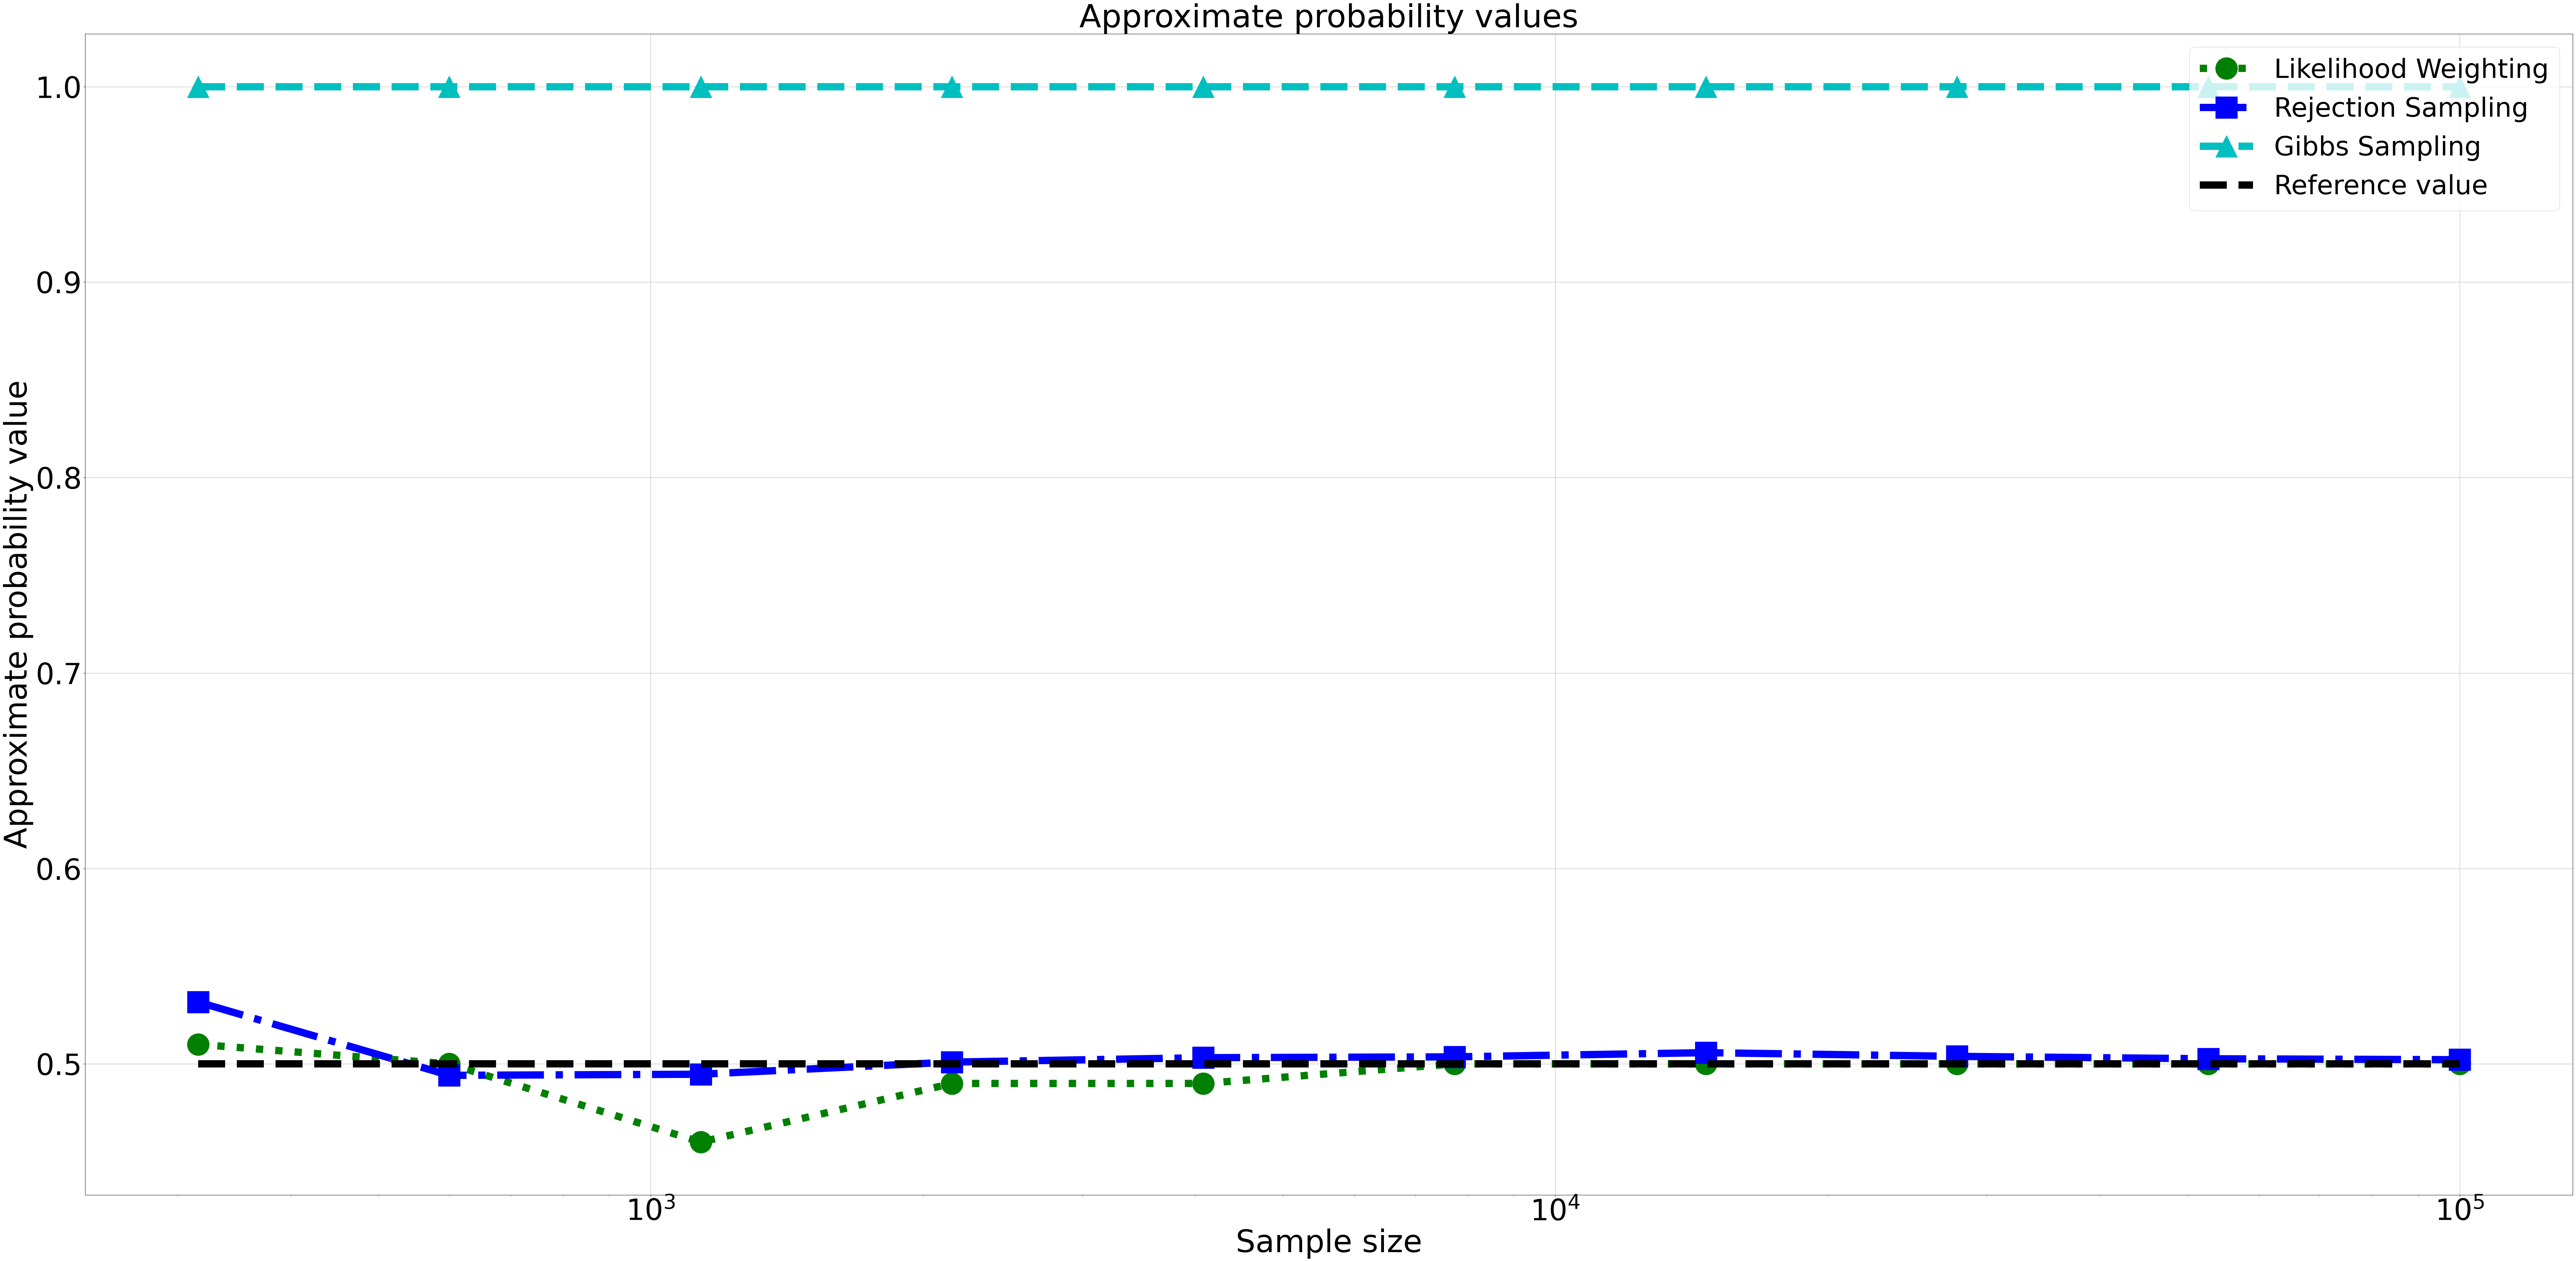

C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bs-" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string 

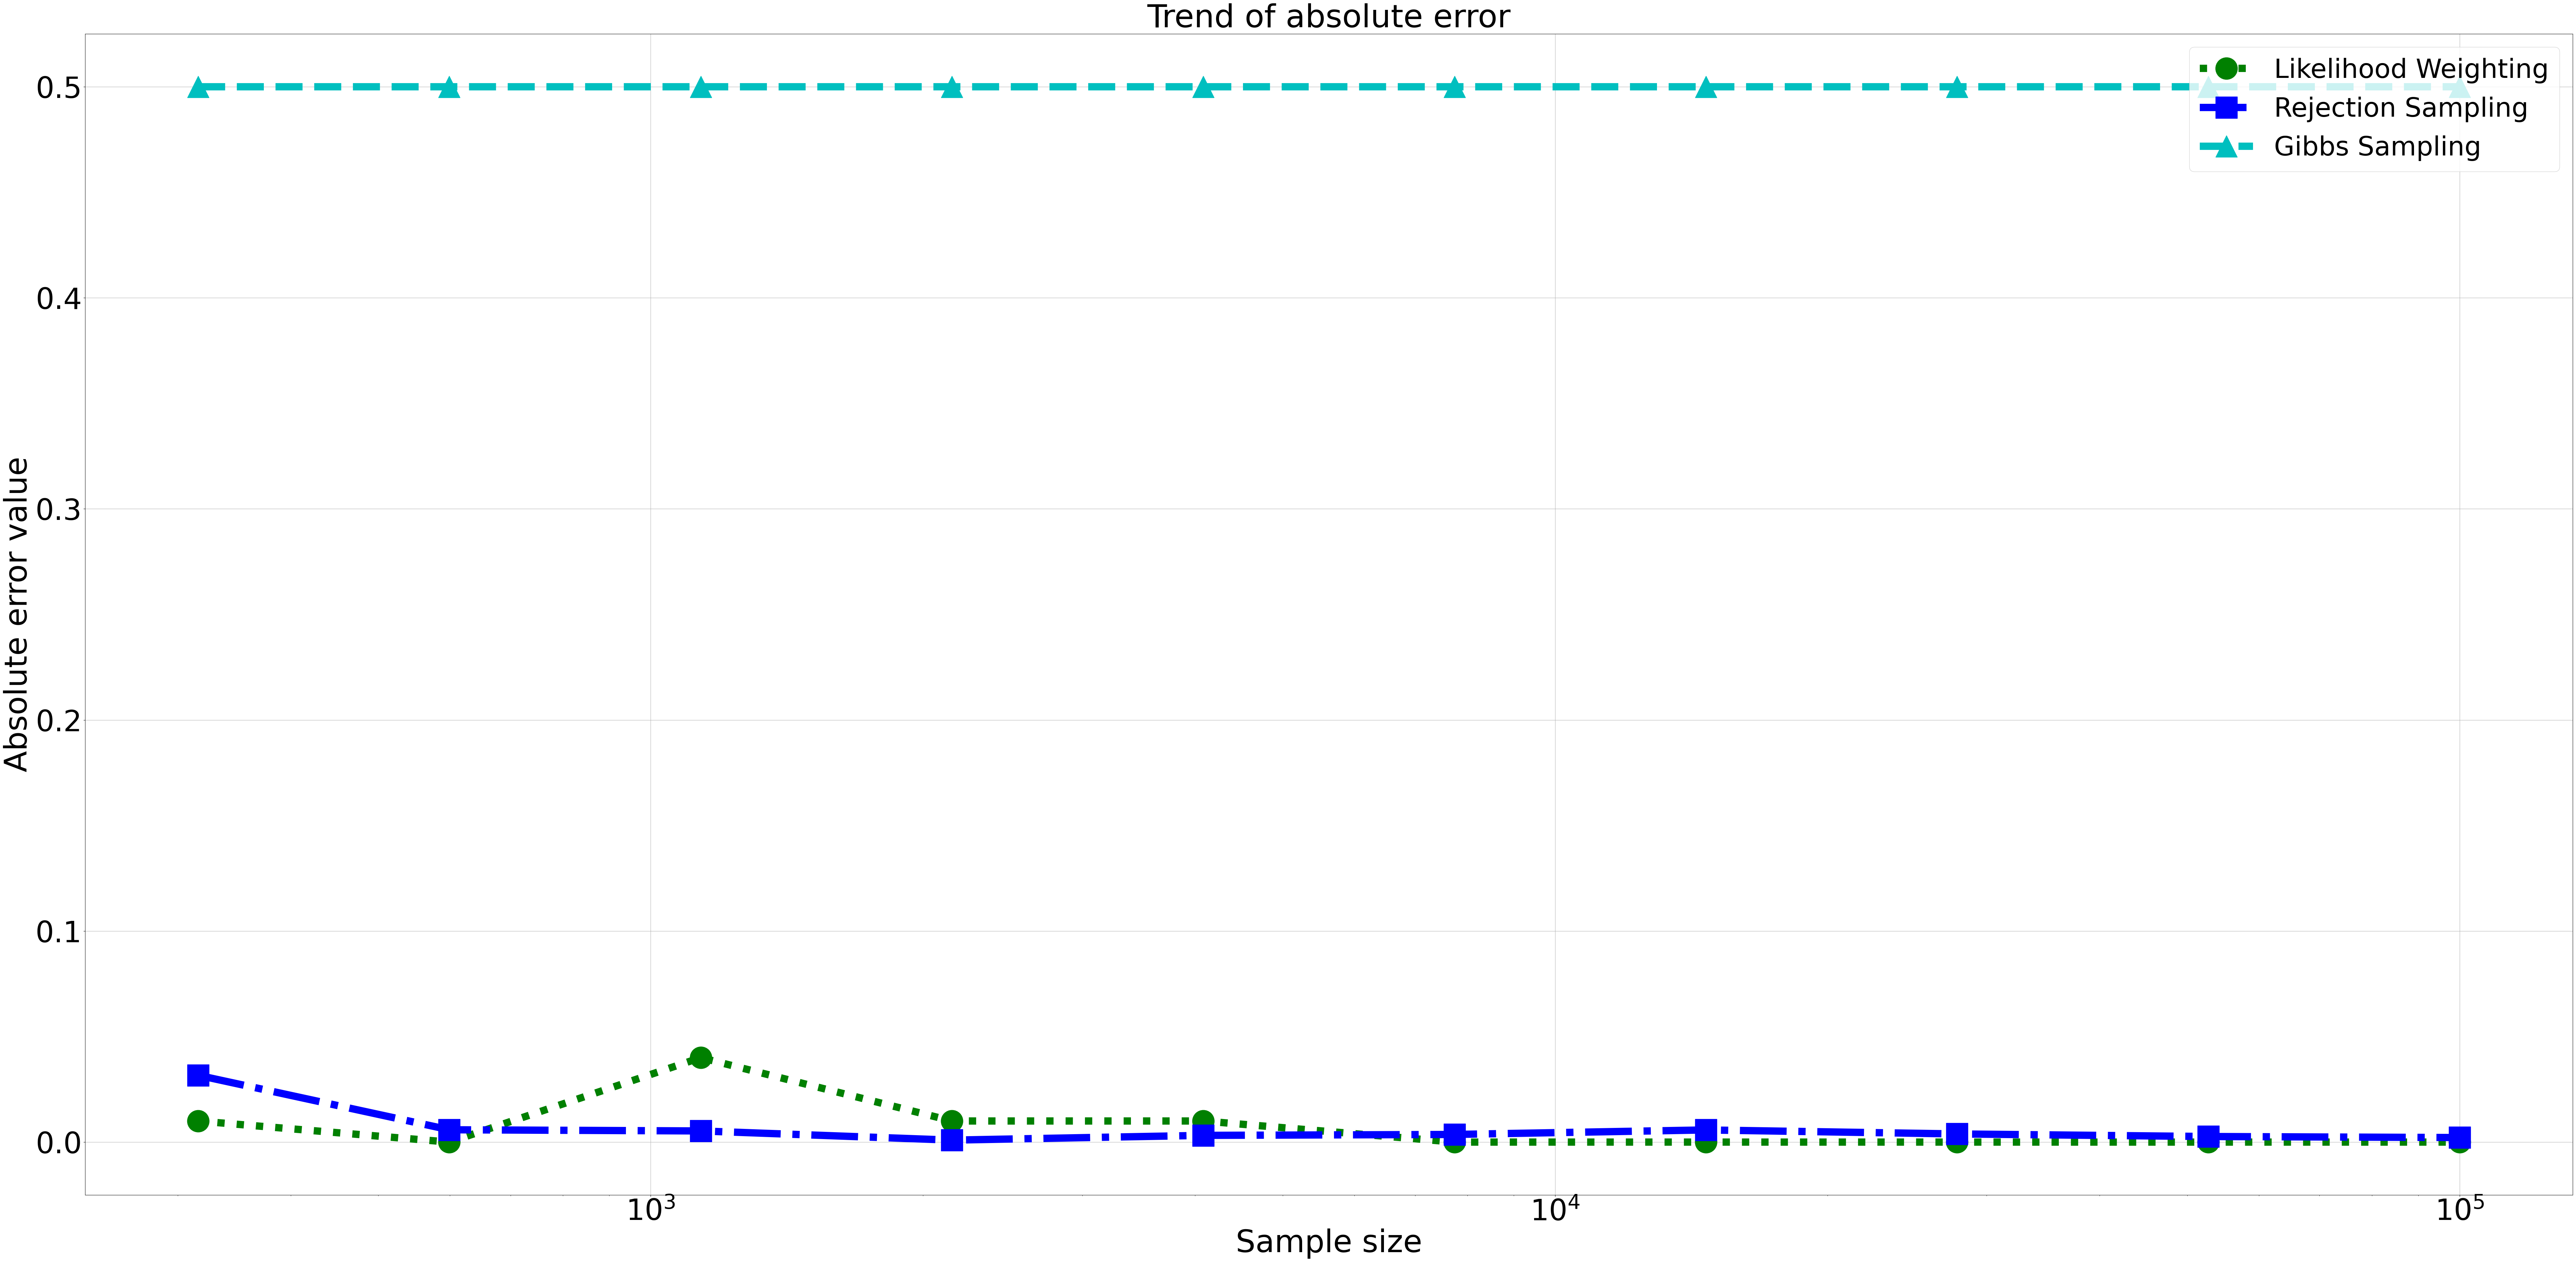

C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:61: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:61: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:62: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bs-" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:62: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string 

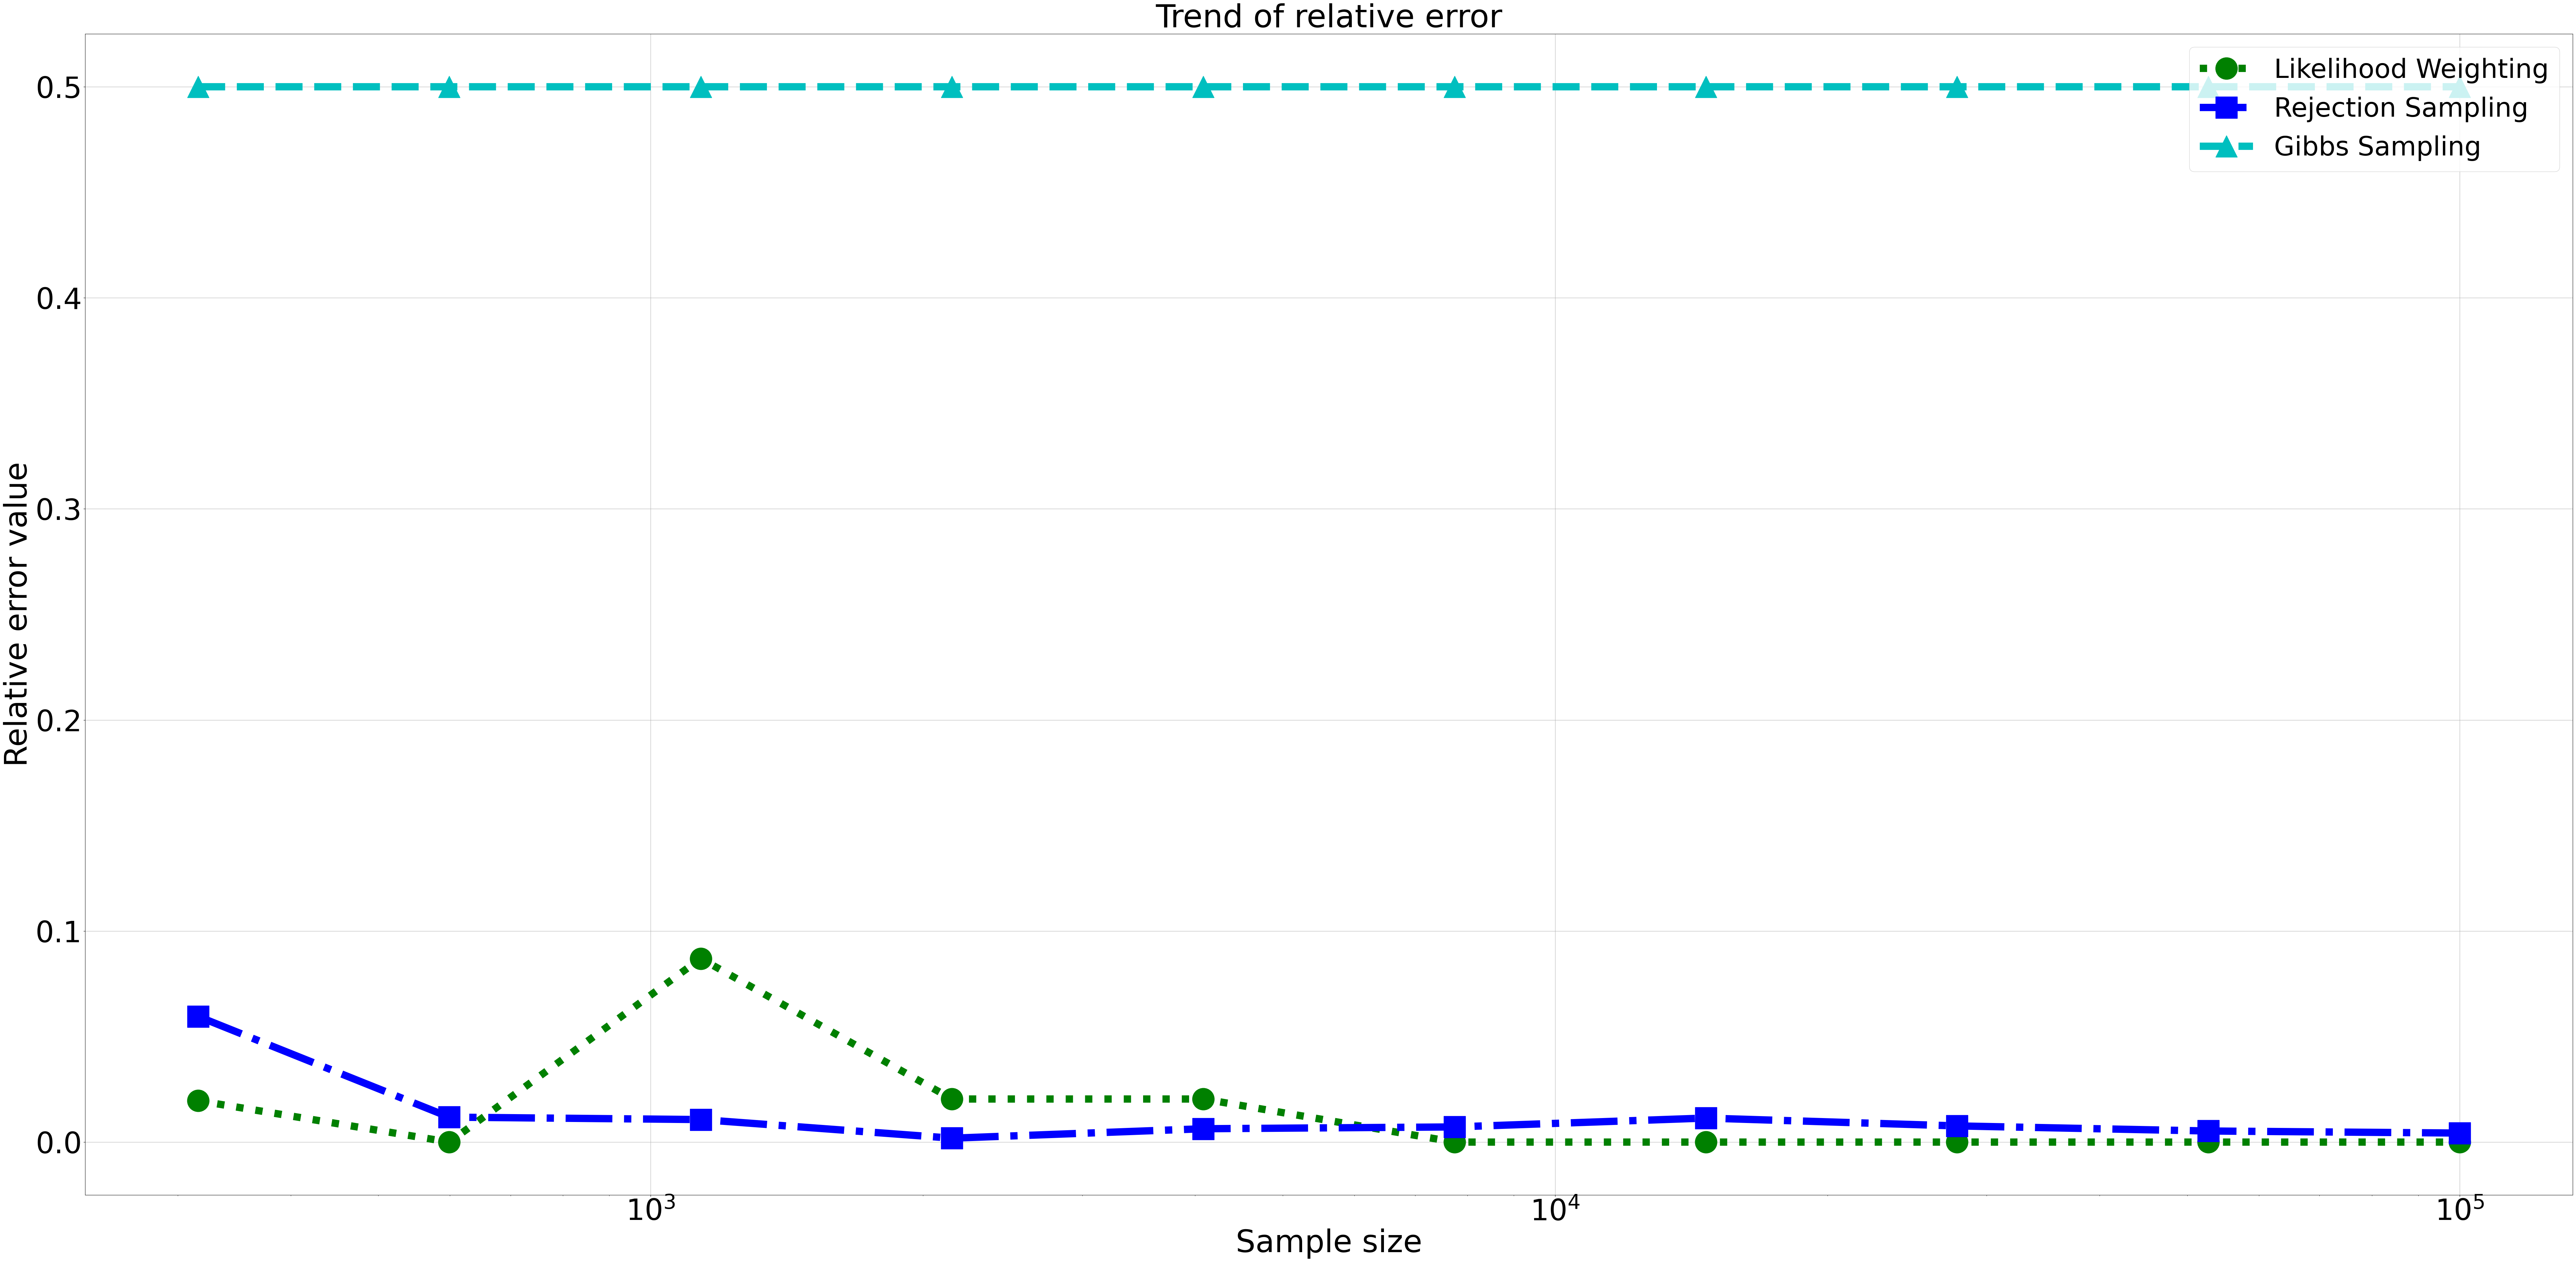

C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:78: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:78: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:79: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bs-" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\Dr.asif Waghan\anaconda3\envs\my_phdproject_env\lib\site-packages\ipykernel_launcher.py:79: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string 

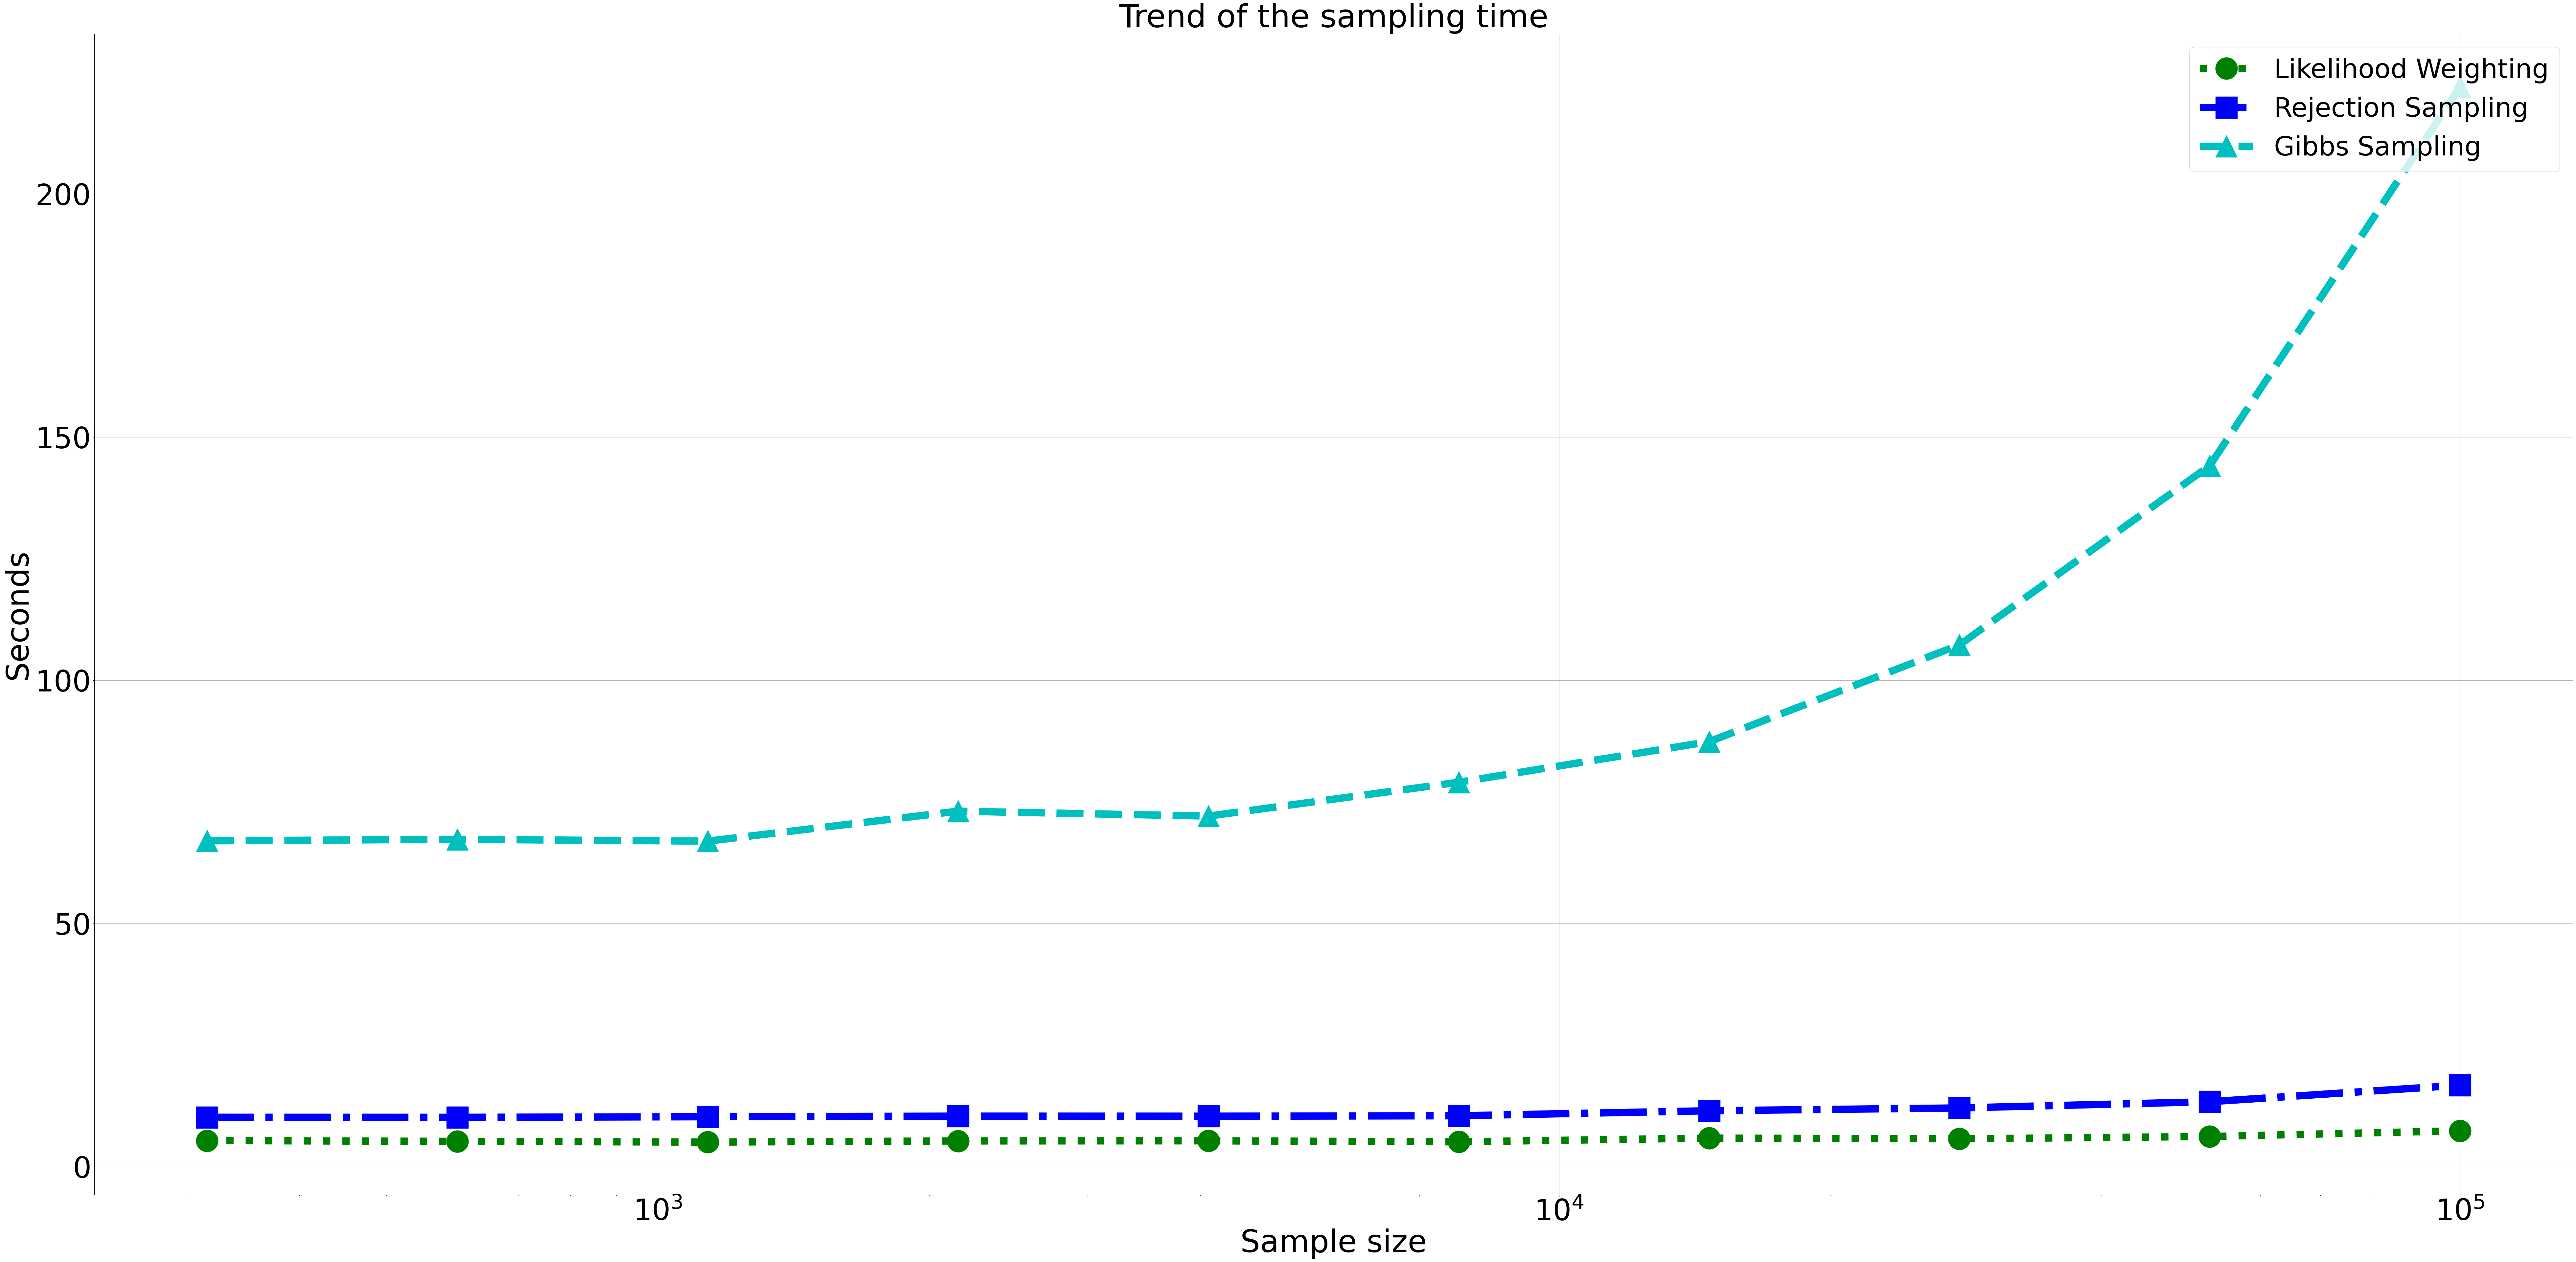

In [22]:
print("P(disease|'nausea':True, 'loss_of_appetite':True,'family_history':True")

query_var = ['prognosis']
query_evidence = { 'nausea':1, 'loss_of_appetite':1,'family_history':1}
value=True
q=1
approximate_inference(q,query_var,query_evidence,value)